# Post process for coloc results

In [1]:
library(tidyverse)
library(data.table)
source("~/project/FunGen_xQTL/2025/May/merge_coloc_also_within_loci.R")


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [2]:
coloc_dirs <- list.files('/data/analysis_result/coloc/', recursive = F, full.names = T)
coloc_dirs <- coloc_dirs %>% .[str_detect(., 'metabolites')]
coloc_dirs

[1] "/data/analysis_result/coloc//metabolites_fsusie"        
[2] "/data/analysis_result/coloc//metabolites_metabrain"     
[3] "/data/analysis_result/coloc//metabolites_multi_context" 
[4] "/data/analysis_result/coloc//metabolites_single_context"
[5] "/data/analysis_result/coloc//metabolites_snatac"

In [3]:
coloc_res_paths <- c()
for(coloc_dir in coloc_dirs){
    coloc_res_paths <- c(coloc_res_paths, list.files(coloc_dir, 'coloc_res', recursive = T, full.names = T))
}


In [4]:
coloc_res_paths_df <- data.frame(file_path = coloc_res_paths %>% gsub('coloc_res', 'rds',. ), 
                                 base_id = basename(coloc_res_paths)) %>% 
                                    mutate(metabolite_region = str_split(base_id, '[.]', simplify = T) %>% .[,1],
                                           context_region = str_split(base_id, '[.]', simplify = T) %>% .[,2])
coloc_res_paths_df %>% head

,file_path,base_id,metabolite_region,context_region
,<chr>,<chr>,<chr>,<chr>
1,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000101_chr3_88209300_94537986.ROSMAP_DLPFC_haQTL_chr3_91560000_98761532.coloc.rds,ROSMAP_metabolome_CHEM100000101_chr3_88209300_94537986.ROSMAP_DLPFC_haQTL_chr3_91560000_98761532.coloc.coloc_res,ROSMAP_metabolome_CHEM100000101_chr3_88209300_94537986,ROSMAP_DLPFC_haQTL_chr3_91560000_98761532
2,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000125_chr5_119340348_120333193.KnightADRC_mQTL_chr5_117836074_123183949.coloc.rds,ROSMAP_metabolome_CHEM100000125_chr5_119340348_120333193.KnightADRC_mQTL_chr5_117836074_123183949.coloc.coloc_res,ROSMAP_metabolome_CHEM100000125_chr5_119340348_120333193,KnightADRC_mQTL_chr5_117836074_123183949
3,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900.MSBB_mQTL_chr5_159393148_164519354.coloc.rds,ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900.MSBB_mQTL_chr5_159393148_164519354.coloc.coloc_res,ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900,MSBB_mQTL_chr5_159393148_164519354
4,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900.MSBB_mQTL_chr5_162437568_166778689.coloc.rds,ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900.MSBB_mQTL_chr5_162437568_166778689.coloc.coloc_res,ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900,MSBB_mQTL_chr5_162437568_166778689
5,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000282_chr11_116513409_117835187.KnightADRC_mQTL_chr11_113210616_117772987.coloc.rds,ROSMAP_metabolome_CHEM100000282_chr11_116513409_117835187.KnightADRC_mQTL_chr11_113210616_117772987.coloc.coloc_res,ROSMAP_metabolome_CHEM100000282_chr11_116513409_117835187,KnightADRC_mQTL_chr11_113210616_117772987
6,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000282_chr18_68166377_69581483.ROSMAP_DLPFC_mQTL_chr18_67673688_71554100.coloc.rds,ROSMAP_metabolome_CHEM100000282_chr18_68166377_69581483.ROSMAP_DLPFC_mQTL_chr18_67673688_71554100.coloc.coloc_res,ROSMAP_metabolome_CHEM100000282_chr18_68166377_69581483,ROSMAP_DLPFC_mQTL_chr18_67673688_71554100


In [5]:
coloc_res_paths_df %>% head

,file_path,base_id,metabolite_region,context_region
,<chr>,<chr>,<chr>,<chr>
1,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000101_chr3_88209300_94537986.ROSMAP_DLPFC_haQTL_chr3_91560000_98761532.coloc.rds,ROSMAP_metabolome_CHEM100000101_chr3_88209300_94537986.ROSMAP_DLPFC_haQTL_chr3_91560000_98761532.coloc.coloc_res,ROSMAP_metabolome_CHEM100000101_chr3_88209300_94537986,ROSMAP_DLPFC_haQTL_chr3_91560000_98761532
2,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000125_chr5_119340348_120333193.KnightADRC_mQTL_chr5_117836074_123183949.coloc.rds,ROSMAP_metabolome_CHEM100000125_chr5_119340348_120333193.KnightADRC_mQTL_chr5_117836074_123183949.coloc.coloc_res,ROSMAP_metabolome_CHEM100000125_chr5_119340348_120333193,KnightADRC_mQTL_chr5_117836074_123183949
3,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900.MSBB_mQTL_chr5_159393148_164519354.coloc.rds,ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900.MSBB_mQTL_chr5_159393148_164519354.coloc.coloc_res,ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900,MSBB_mQTL_chr5_159393148_164519354
4,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900.MSBB_mQTL_chr5_162437568_166778689.coloc.rds,ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900.MSBB_mQTL_chr5_162437568_166778689.coloc.coloc_res,ROSMAP_metabolome_CHEM100000276_chr5_162954046_164219900,MSBB_mQTL_chr5_162437568_166778689
5,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000282_chr11_116513409_117835187.KnightADRC_mQTL_chr11_113210616_117772987.coloc.rds,ROSMAP_metabolome_CHEM100000282_chr11_116513409_117835187.KnightADRC_mQTL_chr11_113210616_117772987.coloc.coloc_res,ROSMAP_metabolome_CHEM100000282_chr11_116513409_117835187,KnightADRC_mQTL_chr11_113210616_117772987
6,/data/analysis_result/coloc//metabolites_fsusie/susie_coloc_xQTL/ROSMAP_metabolome_CHEM100000282_chr18_68166377_69581483.ROSMAP_DLPFC_mQTL_chr18_67673688_71554100.coloc.rds,ROSMAP_metabolome_CHEM100000282_chr18_68166377_69581483.ROSMAP_DLPFC_mQTL_chr18_67673688_71554100.coloc.coloc_res,ROSMAP_metabolome_CHEM100000282_chr18_68166377_69581483,ROSMAP_DLPFC_mQTL_chr18_67673688_71554100


In [69]:
coloc_res_paths_df %>% pull(file_path) %>% length 

[1] 1094

In [70]:
res <- list()

metabolite_ids <- unique(coloc_res_paths_df$metabolite_region)

for (i in seq_along(metabolite_ids)) {
  tryCatch({
    metabolite_id <- metabolite_ids[i]
    
    same_region_path <- coloc_res_paths_df %>%
      filter(metabolite_region == metabolite_id) %>%
      pull(file_path)
    
    res[[i]] <- merge_coloc_sets(same_region_path, overlap_pip_sum_threshold = 0.5)
    
    if (i %% 20 == 0) {
      message(sprintf("Completed %d out of %d jobs", i, length(metabolite_ids)))
    }
  }, error = function(e) {
    message(sprintf("Error in %s: %s", metabolite_ids[i], e$message))
  })
}

Completed 20 out of 441 jobs

Completed 40 out of 441 jobs

Completed 60 out of 441 jobs

Completed 80 out of 441 jobs

Completed 100 out of 441 jobs

Completed 120 out of 441 jobs

Completed 140 out of 441 jobs

Completed 160 out of 441 jobs

Completed 180 out of 441 jobs

Completed 200 out of 441 jobs

Completed 220 out of 441 jobs

Completed 240 out of 441 jobs

Completed 260 out of 441 jobs

Completed 280 out of 441 jobs

Completed 300 out of 441 jobs

Completed 320 out of 441 jobs

Completed 340 out of 441 jobs

Completed 360 out of 441 jobs

Completed 380 out of 441 jobs

Completed 400 out of 441 jobs

Completed 420 out of 441 jobs

Completed 440 out of 441 jobs



In [75]:
saveRDS(res, 'FunGen_xQTL_metabolites.coloc70.merged.Apr2025.rds')

In [39]:
res <- readRDS('FunGen_xQTL_metabolites.coloc70.merged.Apr2025.rds')

In [8]:
# Extract and convert each CoS_union_outcomes to character
res_char <- lapply(res, function(x) {
  x$merged_cos$CoS_union_outcomes %>% unlist %>% as.character()
})

In [9]:

res_df <- data.frame(merged_pair = unlist(res_char) %>% as.character()) %>%
  mutate(
    split_parts = str_split(merged_pair, "; "),
    metabolite_region = map_chr(split_parts, ~ .x[1]) %>% gsub('ROSMAP_metaQTL.', '', .) %>% gsub('.univariate_susie_twas_weights', '', .),
    contexts = map(split_parts, ~ .x[-1])
  ) %>%
  select(-split_parts, -merged_pair)

In [10]:
res_df_sum <- res_df %>%
  mutate(metabolite = str_extract(metabolite_region, "ROSMAP.+$")) %>%
  group_by(metabolite) %>%
  summarise(
    metabolite_regions = paste(metabolite_region %>% unique, collapse = "; "),
    contexts = contexts %>% flatten_chr() %>% unique %>% paste(collapse = "; ")
  )

In [11]:
res_df_sum <- res_df_sum %>%
  mutate(
    # Split context by ";", then extract ENSG IDs from each part using regex
    ensg_ids = str_extract_all(contexts, "ENSG\\d+")
  ) %>%
  rowwise() %>%
  mutate(
    # Count number of unique ENSG IDs
    n_gene = length(unique(ensg_ids))
  ) %>%
  ungroup() %>%
  select(metabolite, n_gene) %>% left_join(res_df_sum)

Joining with `by = join_by(metabolite)`


In [12]:
 res_df_sum %>% pull(n_gene) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   2.158   3.000  30.000 

In [13]:
res_df_sum %>% pull(metabolite) %>% unique %>% length

[1] 259

In [14]:
res_df_sum %>% arrange(desc(n_gene)) %>% head

metabolite                      n_gene
1 ROSMAP_metabolome_CHEM100000282 30    
2 ROSMAP_metabolome_CHEM100001851 18    
3 ROSMAP_metabolome_CHEM100001662 15    
4 ROSMAP_metabolome_CHEM100015624 10    
5 ROSMAP_metabolome_CHEM189       10    
6 ROSMAP_metabolome_CHEM331       10    
  metabolite_regions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1 chr11_116513409_117835187_ROSMAP_metabolome_CHEM100000282; chr18_68166377_69581483_ROSMAP_metabolome_CHEM100000282; chr8_6537503_8880095_ROSMAP_metabolome_CHEM100000282; chr10_82231647_83966001_ROSMAP_metabolome_CHEM100000282; chr12_2067099_3219245_ROSMAP_metabolome_CHEM100000282; chr18_7090236_8658509_ROSMAP_metabolome_CHEM100000282; chr1_234364329_235656952_ROSMAP_metabolome_CHEM100000282; chr1_81525772_83003483_ROSMAP_metabolome_CHEM100000282; chr22_10516173_17414263_ROSMAP_metabolome_CHEM100000282; chr2_131938574_134400811_ROSMAP_metabolome_CHEM100000282; chr2_3926189_5567778_ROSMAP_metabolome_CHEM100000282; chr3_112690384_114706122_ROSMAP_metabolome_CHEM100000282; chr3_42375669_45108216_ROSMAP_metabolome_CHEM100000282; chr4_126353190_128547006_ROSMAP_metabolome_CHEM100000282; chr4_43205452_47542521_ROSMAP_metabolome_CHEM100000282; chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000282; chr8_143034200_145075767_ROSMAP_metabolome_CHEM100000282; chr8_97568971_100485780_ROSMAP_metabolome_CHEM100000282; chr4_182023425_183841077_ROSMAP_metabolome_CHEM100000282
2 chr18_68166377_69581483_ROSMAP_metabolome_CHEM100001851; chr8_74340073_76961768_ROSMAP_metabolome_CHEM100001851; chr10_1693015_2596251_ROSMAP_metabolome_CHEM100001851; chr11_116513409_117835187_ROSMAP_metabolome_CHEM100001851; chr12_102729561_104526113_ROSMAP_metabolome_CHEM100001851; chr12_2067099_3219245_ROSMAP_metabolome_CHEM100001851; chr18_7090236_8658509_ROSMAP_metabolome_CHEM100001851; chr18_71953820_73750620_ROSMAP_metabolome_CHEM100001851; chr1_234364329_235656952_ROSMAP_metabolome_CHEM100001851; chr1_81525772_83003483_ROSMAP_metabolome_CHEM100001851; chr2_3926189_5567778_ROSMAP_metabolome_CHEM100001851; chr7_128149110_129951388_ROSMAP_metabolome_CHEM100001851; chr8_71102974_72924454_ROSMAP_metabolome_CHEM100001851; chr8_71179_1212769_ROSMAP_metabolome_CHEM100001851; chr8_97568971_100485780_ROSMAP_metabolome_CHEM100001851; chr9_99996542_101945775_ROSMAP_metabolome_CHEM100001851                                                                                                                                                                                  
3 chr1_195599253_199271134_ROSMAP_metabolome_CHEM100001662; chr7_12595836_13740859_ROSMAP_metabolome_CHEM100001662; chr2_130787741_131938574_ROSMAP_metabolome_CHEM100001662; chr10_1693015_2596251_ROSMAP_metabolome_CHEM100001662; chr18_31787670_34878947_ROSMAP_metabolome_CHEM100001662; chr21_44518132_46696121_ROSMAP_metabolome_CHEM100001662; chr2_179338809_182822595_ROSMAP_metabolome_CHEM100001662; chr4_125559113_126353190_ROSMAP_metabolome_CHEM100001662; chr5_121650726_1

In [25]:
res_df_sum %>%
  mutate(genes = str_extract_all(contexts, "ENSG\\d+")) %>%
  unnest(genes) %>%
  distinct() %>% dim

[1] 559   5

In [15]:
metabolite_genes <- res_df_sum %>% pull(contexts) %>% str_extract_all(., "ENSG\\d+") %>% unlist%>% unique

In [16]:
metabolite_genes %>% length

[1] 381

In [43]:
metabolite_genes %>% writeLines('FunGen_xQTL_metabolites_coloc_genes.txt')

### KEGG analysis

In [36]:
library(clusterProfiler)  # for enrichment
library(org.Hs.eg.db)     # for human gene annotation
library(enrichplot)       # for plotting
library(DOSE)             # for visualization support

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(metabolite_genes, fromType = "ENSEMBL", toType = "ENTREZID", :
"2.1% of input gene IDs are fail to map..."
Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



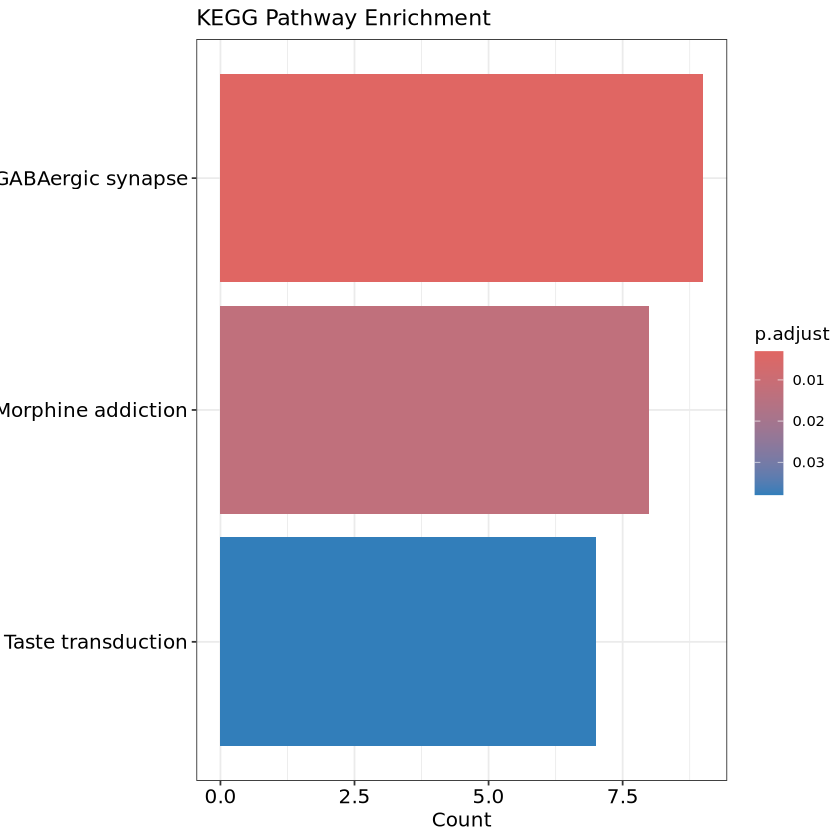

In [38]:

# Convert gene symbols to Entrez IDs
entrez_ids <- bitr(metabolite_genes, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

# Run KEGG enrichment
kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 0.05)

# Visualize results
barplot(kegg_enrich, showCategory = 20, title = "KEGG Pathway Enrichment")

In [42]:
kegg_enrich@result %>% head

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04727,Organismal Systems,Nervous system,hsa04727,GABAergic synapse,9/140,89/8653,1.245507e-05,0.003063948,0.002989218,2555/6539/9568/775/2557/2566/2561/5567/114,9
hsa05032,Human Diseases,Substance dependence,hsa05032,Morphine addiction,8/140,91/8653,1.054524e-04,0.012970644,0.012654287,2555/9568/2557/2566/2561/5136/5567/114,8
hsa04742,Organismal Systems,Sensory system,hsa04742,Taste transduction,7/140,86/8653,4.626820e-04,0.037939921,0.037014557,2555/9568/775/2557/5136/5567/114,7
hsa05033,Human Diseases,Substance dependence,hsa05033,Nicotine addiction,4/140,41/8653,4.179389e-03,0.242005492,0.236102919,2555/2557/2566/2561,4
hsa04082,NA,NA,hsa04082,Neuroactive ligand signaling,9/140,199/8653,4.918811e-03,0.242005492,0.236102919,2555/6539/9568/2898/2557/2566/2561/5567/114,9
hsa05414,Human Diseases,Cardiovascular disease,hsa05414,Dilated cardiomyopathy,6/140,105/8653,6.998334e-03,0.286931699,0.279933364,775/8516/93589/137868/5567/114,6


### heatmap

In [1]:
library(tidyverse)
library(data.table)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [2]:
res_df_sum <- fread('FunGen_xQTL_metabolites.coloc70.merged.Apr2025.flatten.tsv')

In [3]:
metabolite_meta <- fread('ROSMAP Metabolon HD4 Data Dictionary.csv')

In [4]:
metabolite_meta <- metabolite_meta %>% mutate(metabolite = paste0('CHEM', CHEM_ID))

In [5]:
metabolite_meta %>% head

CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,PATHWAY_STATUS,TYPE,INCHIKEY,...,CHEMICAL_NAME,SHORT_NAME,CAS,CHEMSPIDER,HMDB,KEGG,PLANT_CYC,PUBCHEM,PLATFORM,metabolite
<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
35,400,42370,166164,Amino Acid,Glutamate Metabolism,62,NA,NAMED,DWAKNKKXGALPNW-REWHXWOFAV,...,S-1-pyrroline-5-carboxylate,S-1-pyrroline-5-carboxylate,2906-39-0,10140206,HMDB0001301,C04322,,11966181,LC/MS Pos Early,CHEM35
41,400,1633,155434,Amino Acid,Histidine Metabolism,85,NA,NAMED,CCLQKVKJOGVQLU-QMMMGPOBBT,...,homocarnosine,homocarnosine,3650-73-5,8418848,HMDB0000745,C00884,,"89235,10243361",LC/MS Pos Early,CHEM41
49,400,1408,155357,Amino Acid,Polyamine Metabolism,537,NA,NAMED,KIDHWZJUCRJVML-UHFFFAOYAX,...,putrescine,putrescine,110-60-1,13837702,HMDB0001414,C00134,PUTRESCINE,1045,LC/MS Pos Early,CHEM49
50,400,485,155305,Amino Acid,Polyamine Metabolism,545,NA,NAMED,ATHGHQPFGPMSJY-UHFFFAOYAK,...,spermidine,spermidine,124-20-9,1071,HMDB0001257,C00315,SPERMIDINE,1102,LC/MS Pos Early,CHEM50
55,400,27665,155829,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,4314,NA,NAMED,LDHMAVIPBRSVRG-UHFFFAOYAE,...,1-methylnicotinamide,1-methylnicotinamide,1005-24-9,8305504,HMDB0000699,C02918,,457,LC/MS Pos Early,CHEM55
62,209,38395,143675,Lipid,"Fatty Acid, Dihydroxy",2030,NA,NAMED,CQSLTKIXAJTQGA-FLIBITNWBI,...,"12,13-DiHOME","12,13-DiHOME",263399-35-5,8412123,HMDB0004705,C14829,CPD-13086,10236635,LC/MS Neg,CHEM62


In [6]:
metabolite_meta %>% pull(SHORT_NAME) %>% unique 

[1] "S-1-pyrroline-5-carboxylate"                                        
   [2] "homocarnosine"                                                      
   [3] "putrescine"                                                         
   [4] "spermidine"                                                         
   [5] "1-methylnicotinamide"                                               
   [6] "12,13-DiHOME"                                                       
   [7] "cytidine 2',3'-cyclic monophosphate"                                
   [8] "alpha-ketoglutarate"                                                
   [9] "kynurenate"                                                         
  [10] "3-hydroxyisobutyrate"                                               
  [11] "3-hydroxy-3-methylglutarate"                                        
  [12] "homovanillate (HVA)"                                                
  [13] "3-phosphoglycerate"                                                 
  [14] "cholate"                                                            
  [15] "gamma-aminobutyrate (GABA)"                                         
  [16] "4-hydroxyphenylacetate"                                             
  [17] "5,6-dihydrothymine"                                                 
  [18] "hypoxanthine"                                                       
  [19] "guanine"                                                            
  [20] "9,10-DiHOME"                                                        
  [21] "linoleate (18:2n6)"                                                 
  [22] "N6,N6,N6-trimethyllysine"                                           
  [23] "N-acetylputrescine"                                                 
  [24] "N-formylmethionine"                                                 
  [25] "S-adenosylhomocysteine (SAH)"                                       
  [26] "ADP"                                                                
  [27] "AMP"                                                                
  [28] "5-methylthioadenosine (MTA)"                                        
  [29] "N6-methyladenosine"                                                 
  [30] "adenosine 5'-diphosphoribose (ADP-ribose)"                          
  [31] "arachidonate (20:4n6)"                                              
  [32] "arginine"                                                           
  [33] "argininosuccinate"                                                  
  [34] "ascorbate (Vitamin C)"                                              
  [35] "aspartate"                                                          
  [36] "3-(4-hydroxyphenyl)lactate (HPLA)"                                  
  [37] "carnosine"                                                          
  [38] "biliverdin"                                                         
  [39] "3-hydroxybutyrate (BHBA)"                                           
  [40] "7-dehydrocholesterol"                                               
  [41] "cholesterol"                                                        
  [42] "phosphocholine"                                                     
  [43] "CoA-glutathione*"                                                   
  [44] "CoA"                                                                
  [45] "corticosterone"                                                     
  [46] "cortisone"                                                          
  [47] "creatinine"                                                         
  [48] "cysteinylglycine"                                                   
  [49] "cystine"                                                            
  [50] "glucosamine-6-phosphate"                                            
  [51] "glucose 6-phosphate"                                                
  [52] "mannose 6-phosphate"                                                

In [7]:
metabolite_meta %>% pull(SUB_PATHWAY) %>% unique 

[1] "Glutamate Metabolism"                                        
  [2] "Histidine Metabolism"                                        
  [3] "Polyamine Metabolism"                                        
  [4] "Nicotinate and Nicotinamide Metabolism"                      
  [5] "Fatty Acid, Dihydroxy"                                       
  [6] "Pyrimidine Metabolism, Cytidine containing"                  
  [7] "TCA Cycle"                                                   
  [8] "Tryptophan Metabolism"                                       
  [9] "Leucine, Isoleucine and Valine Metabolism"                   
 [10] "Mevalonate Metabolism"                                       
 [11] "Tyrosine Metabolism"                                         
 [12] "Glycolysis, Gluconeogenesis, and Pyruvate Metabolism"        
 [13] "Primary Bile Acid Metabolism"                                
 [14] "Phenylalanine Metabolism"                                    
 [15] "Pyrimidine Metabolism, Thymine containing"                   
 [16] "Purine Metabolism, (Hypo)Xanthine/Inosine containing"        
 [17] "Purine Metabolism, Guanine containing"                       
 [18] "Long Chain Polyunsaturated Fatty Acid (n3 and n6)"           
 [19] "Lysine Metabolism"                                           
 [20] "Methionine, Cysteine, SAM and Taurine Metabolism"            
 [21] "Purine Metabolism, Adenine containing"                       
 [22] "Urea cycle; Arginine and Proline Metabolism"                 
 [23] "Ascorbate and Aldarate Metabolism"                           
 [24] "Alanine and Aspartate Metabolism"                            
 [25] "Hemoglobin and Porphyrin Metabolism"                         
 [26] "Ketone Bodies"                                               
 [27] "Sterol"                                                      
 [28] "Phospholipid Metabolism"                                     
 [29] "Glutathione Metabolism"                                      
 [30] "Pantothenate and CoA Metabolism"                             
 [31] "Corticosteroids"                                             
 [32] "Creatine Metabolism"                                         
 [33] "Aminosugar Metabolism"                                       
 [34] "Fructose, Mannose and Galactose Metabolism"                  
 [35] "Sphingosines"                                                
 [36] "Secondary Bile Acid Metabolism"                              
 [37] "Sphingolipid Synthesis"                                      
 [38] "Riboflavin Metabolism"                                       
 [39] "Gamma-glutamyl Amino Acid"                                   
 [40] "Nucleotide Sugar"                                            
 [41] "Food Component/Plant"                                        
 [42] "Fatty Acid, Dicarboxylate"                                   
 [43] "Glycine, Serine and Threonine Metabolism"                    
 [44] "Inositol Metabolism"                                         
 [45] "Fatty Acid Metabolism (also BCAA Metabolism)"                
 [46] "Long Chain Saturated Fatty Acid"                             
 [47] "Medium Chain Fatty Acid"                                     
 [48] "Pyrimidine Metabolism, Orotate containing"                   
 [49] "Long Chain Monounsaturated Fatty Acid"                       
 [50] "Oxidative Phosphorylation"                                   
 [51] "Eicosanoid"                                                  
 [52] "Vitamin B6 Metabolism"                                       
 [53] "Vitamin A Metabolism"                                        
 [54] "Drug - Topical Agents"                                       
 [55] "Pyrimidine Metabolism, Uracil containing"                    
 [56] "Fatty Acid Synthesis"                                        
 [57] "Pentose Metabolism"                                          
 [58] "Tobacco Metabolite"                                          


In [8]:
metabolite_meta %>% dim

[1] 1055   21

In [9]:
expand_context_entries <- function(x) {
  # First split by "; " to separate main entries
    split_main <- str_split(x, "; ")[[1]]
  
  # Initialize result
  expanded <- c()
  
  for (entry in split_main) {
    # Check if there is a pattern like ..._bvsr_...;...
    if (str_detect(entry, "_bvsr_") && str_count(entry, ";") > 0) {
      # Get the prefix before the first semicolon
      prefix <- str_split(entry, "_bvsr_", simplify = TRUE)[,1]
      suffixes <- str_split(entry, "_bvsr_", simplify = TRUE)[,2] %>%
        str_split(";", simplify = FALSE) %>% unlist()
      expanded <- c(expanded, paste0(prefix, "_bvsr_", suffixes))
    } else {
      expanded <- c(expanded, entry)
    }
  }
  
  paste(expanded, collapse = "; ")
}


res_df_sum_long <- res_df_sum %>%
  rowwise() %>%
  mutate(contexts = expand_context_entries(contexts)) %>% 
  separate_rows(contexts, sep = ";\\s*") %>%
  mutate(
    # Extract and clean context identifiers
    context_clean = str_extract(contexts, "_(ROSMAP|KNIGHT|MSBB|Metabrain|STARNET|Exc|Inh|Ast|Mic|OPC|Oli|Knight|KnightADRC|MiGA|AC|PCC|DLPFC)_[^\\.]+|^(AC|PCC|DLPFC|Exc|Inh|Ast|Mic|OPC|Oli)_[^\\.]+") %>%
      str_remove("_chr.+$") %>%
      str_remove("_ENSG[0-9]+") %>%
      str_remove("_gp.+$") %>%
      str_remove("^_"),
    
    # Adjust specific context names
    context_clean = ifelse(context_clean == 'DLPFC_Klein', 'DLPFC_Klein_pQTL', context_clean),
    context_clean = ifelse(str_detect(context_clean, 'Metabrain'), paste0(context_clean, '_eQTL'), context_clean),
    context_clean = ifelse(str_detect(contexts, 'monocyte_ROSMAP_eQTL'), 'ROSMAP_monocyte_eQTL', context_clean),
    context_clean = ifelse(str_detect(contexts, 'multicontext'), str_replace(context_clean, 'QTL', 'QTL_multi'), context_clean),
    context_clean = ifelse(str_detect(context_clean, 'Exc|Inh|Ast|Mic|OPC|Oli') & !str_detect(context_clean, 'multi'), 
                           str_replace(context_clean, '_eQTL', '_snuc_eQTL'), context_clean),
    
    # Clean metabolite name
    metabolite = str_replace(metabolite, "ROSMAP_metabolome_", "")
    #   ,
    
    # # Count number of ENSG gene IDs per context
    # n_gene = str_count(contexts, "ENSG\\d+")
  ) 

In [10]:
res_df_sum_long %>% filter(metabolite == 'CHEM100000272')

metabolite,n_gene,metabolite_regions,contexts,context_clean
<chr>,<int>,<chr>,<chr>,<chr>
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,RSS_QC_RAISS_imputed.chr7_127476747_130880000_ENSG00000165055.univariate_susie_rss_Metabrain_Cerebellum,Metabrain_Cerebellum_eQTL
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,RSS_QC_RAISS_imputed.chr7_127476747_130880000_ENSG00000165055.univariate_susie_rss_Metabrain_Cortex,Metabrain_Cortex_eQTL
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,ROSMAP_DeJager.chr7_ENSG00000165055.multicontext_bvsr_AC_DeJager_eQTL,AC_DeJager_eQTL_multi
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,ROSMAP_DeJager.chr7_ENSG00000165055.multicontext_bvsr_Ast_DeJager_eQTL,Ast_DeJager_eQTL_multi
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,ROSMAP_DeJager.chr7_ENSG00000165055.multicontext_bvsr_DLPFC_DeJager_eQTL,DLPFC_DeJager_eQTL_multi
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,ROSMAP_DeJager.chr7_ENSG00000165055.multicontext_bvsr_Exc_DeJager_eQTL,Exc_DeJager_eQTL_multi
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,ROSMAP_DeJager.chr7_ENSG00000165055.multicontext_bvsr_Inh_DeJager_eQTL,Inh_DeJager_eQTL_multi
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,ROSMAP_DeJager.chr7_ENSG00000165055.multicontext_bvsr_Oli_DeJager_eQTL,Oli_DeJager_eQTL_multi
CHEM100000272,1,chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000272,ROSMAP_DeJager.chr7_ENSG00000165055.multicontext_bvsr_PCC_DeJager_eQTL,PCC_DeJager_eQTL_multi


In [11]:
# Summarize and reshape for heatmap
heatmap_data <- res_df_sum_long %>%
  group_by(metabolite, context_clean) %>%
  summarise(n_gene = sum(n_gene), .groups = "drop") %>%
  pivot_wider(names_from = metabolite, values_from = n_gene, values_fill = 0)

# Convert to long format for ggplot
plot_data <- heatmap_data %>%
  pivot_longer(-context_clean, names_to = "metabolite", values_to = "n_gene")

In [12]:
# Set plot dimensions
options(repr.plot.width = 16, repr.plot.height = 10)

# Merge SUPER_PATHWAY information from metabolite_meta
df_merged <- res_df_sum_long %>%
  left_join(metabolite_meta %>% select(metabolite, SUPER_PATHWAY), by = "metabolite")
# Count the number of metabolites in each SUPER_PATHWAY
metabolite_counts <- df_merged %>%
  group_by(SUPER_PATHWAY) %>%
  summarise(SUPER_PATHWAY_size = n_distinct(metabolite)) %>%
  ungroup()


# Merge this count back into the original dataframe
df_merged <- df_merged %>%
  left_join(metabolite_counts, by = "SUPER_PATHWAY") %>%
  # Reorder metabolites within each SUPER_PATHWAY based on the SUPER_PATHWAY size
  mutate(
    metabolite = factor(metabolite, levels = unique(metabolite[order(SUPER_PATHWAY_size)])),
    SUPER_PATHWAY = gsub(' ', '\n', SUPER_PATHWAY)  # Apply line breaks to SUPER_PATHWAY
  )%>%
  # Reorder SUPER_PATHWAY based on the number of metabolites in each pathway
  mutate(SUPER_PATHWAY = factor(SUPER_PATHWAY, levels = unique(SUPER_PATHWAY[order(-SUPER_PATHWAY_size)]))) 

qtl_order <- c("eQTL_multi", "pQTL_multi", "snuc_eQTL", "eQTL", "sQTL", "pQTL", "mQTL", "haQTL","ATACQTL", "caQTL")

df_merged <- df_merged %>%
  mutate(
    # Extract QTL type and make it an ordered factor
    qtl_type = str_extract(context_clean, paste(qtl_order, collapse = "|")),
      qtl_type = ifelse(str_detect(context_clean, 'eQTL_multi'), 'eQTL_multi', qtl_type),
      qtl_type = ifelse(str_detect(context_clean, 'pQTL_multi'), 'pQTL_multi', qtl_type),
    qtl_type = factor(qtl_type, levels = qtl_order)
  ) %>%
  arrange(qtl_type, context_clean) %>%
  mutate(
    context_clean = factor(context_clean, levels = unique(context_clean))
  ) %>% mutate(gene = str_extract(contexts, 'ENSG[0-9]+')) %>% group_by(metabolite, context_clean) %>% summarise(n_gene = n_distinct(gene)) %>% 
left_join(df_merged %>% select(-metabolite_regions, -contexts, -n_gene), by = c("metabolite", "context_clean"))


`summarise()` has grouped output by 'metabolite'. You can override using the
`.groups` argument.


In [13]:
df_merged$context_clean <- factor(df_merged$context_clean, levels = c('AC_DeJager_eQTL_multi','Ast_DeJager_eQTL_multi','DLPFC_DeJager_eQTL_multi','Exc_DeJager_eQTL_multi','Inh_DeJager_eQTL_multi','Mic_DeJager_eQTL_multi','OPC_DeJager_eQTL_multi','Oli_DeJager_eQTL_multi','PCC_DeJager_eQTL_multi','ROSMAP_monocyte_eQTL_multi','DLPFC_Bennett_pQTL_multi','Ast_10_Kellis_snuc_eQTL','Ast_DeJager_snuc_eQTL','Ast_Kellis_snuc_eQTL','Ast_mega_snuc_eQTL','Exc_DeJager_snuc_eQTL','Exc_Kellis_snuc_eQTL','Exc_mega_snuc_eQTL','Inh_DeJager_snuc_eQTL','Inh_Kellis_snuc_eQTL','Inh_mega_snuc_eQTL','OPC_DeJager_snuc_eQTL','OPC_Kellis_snuc_eQTL','OPC_mega_snuc_eQTL','Oli_DeJager_snuc_eQTL','Oli_Kellis_snuc_eQTL','Oli_mega_snuc_eQTL','ROSMAP_monocyte_eQTL','MiGA_GTS_eQTL','MiGA_SVZ_eQTL','MiGA_THA_eQTL','AC_DeJager_eQTL','DLPFC_DeJager_eQTL','PCC_DeJager_eQTL','Knight_eQTL_brain','MSBB_eQTL','STARNET_eQTL_Mac','Metabrain_Basalganglia_eQTL','Metabrain_Cerebellum_eQTL','Metabrain_Cortex_eQTL','Metabrain_Hippocampus_eQTL','Metabrain_Spinalcord_eQTL','ROSMAP_AC_sQTL','ROSMAP_DLPFC_sQTL','ROSMAP_PCC_sQTL','DLPFC_Bennett_pQTL','DLPFC_Klein_pQTL','Knight_pQTL_brain','MSBB_BM36_pQTL','KnightADRC_mQTL','MSBB_mQTL','ROSMAP_DLPFC_mQTL','ROSMAP_DLPFC_haQTL','ROSMAP_Astro_snATACQTL','ROSMAP_Exc_snATACQTL','ROSMAP_Inh_snATACQTL','ROSMAP_Mic_snATACQTL','ROSMAP_OPC_snATACQTL','ROSMAP_Oligo_snATACQTL'))

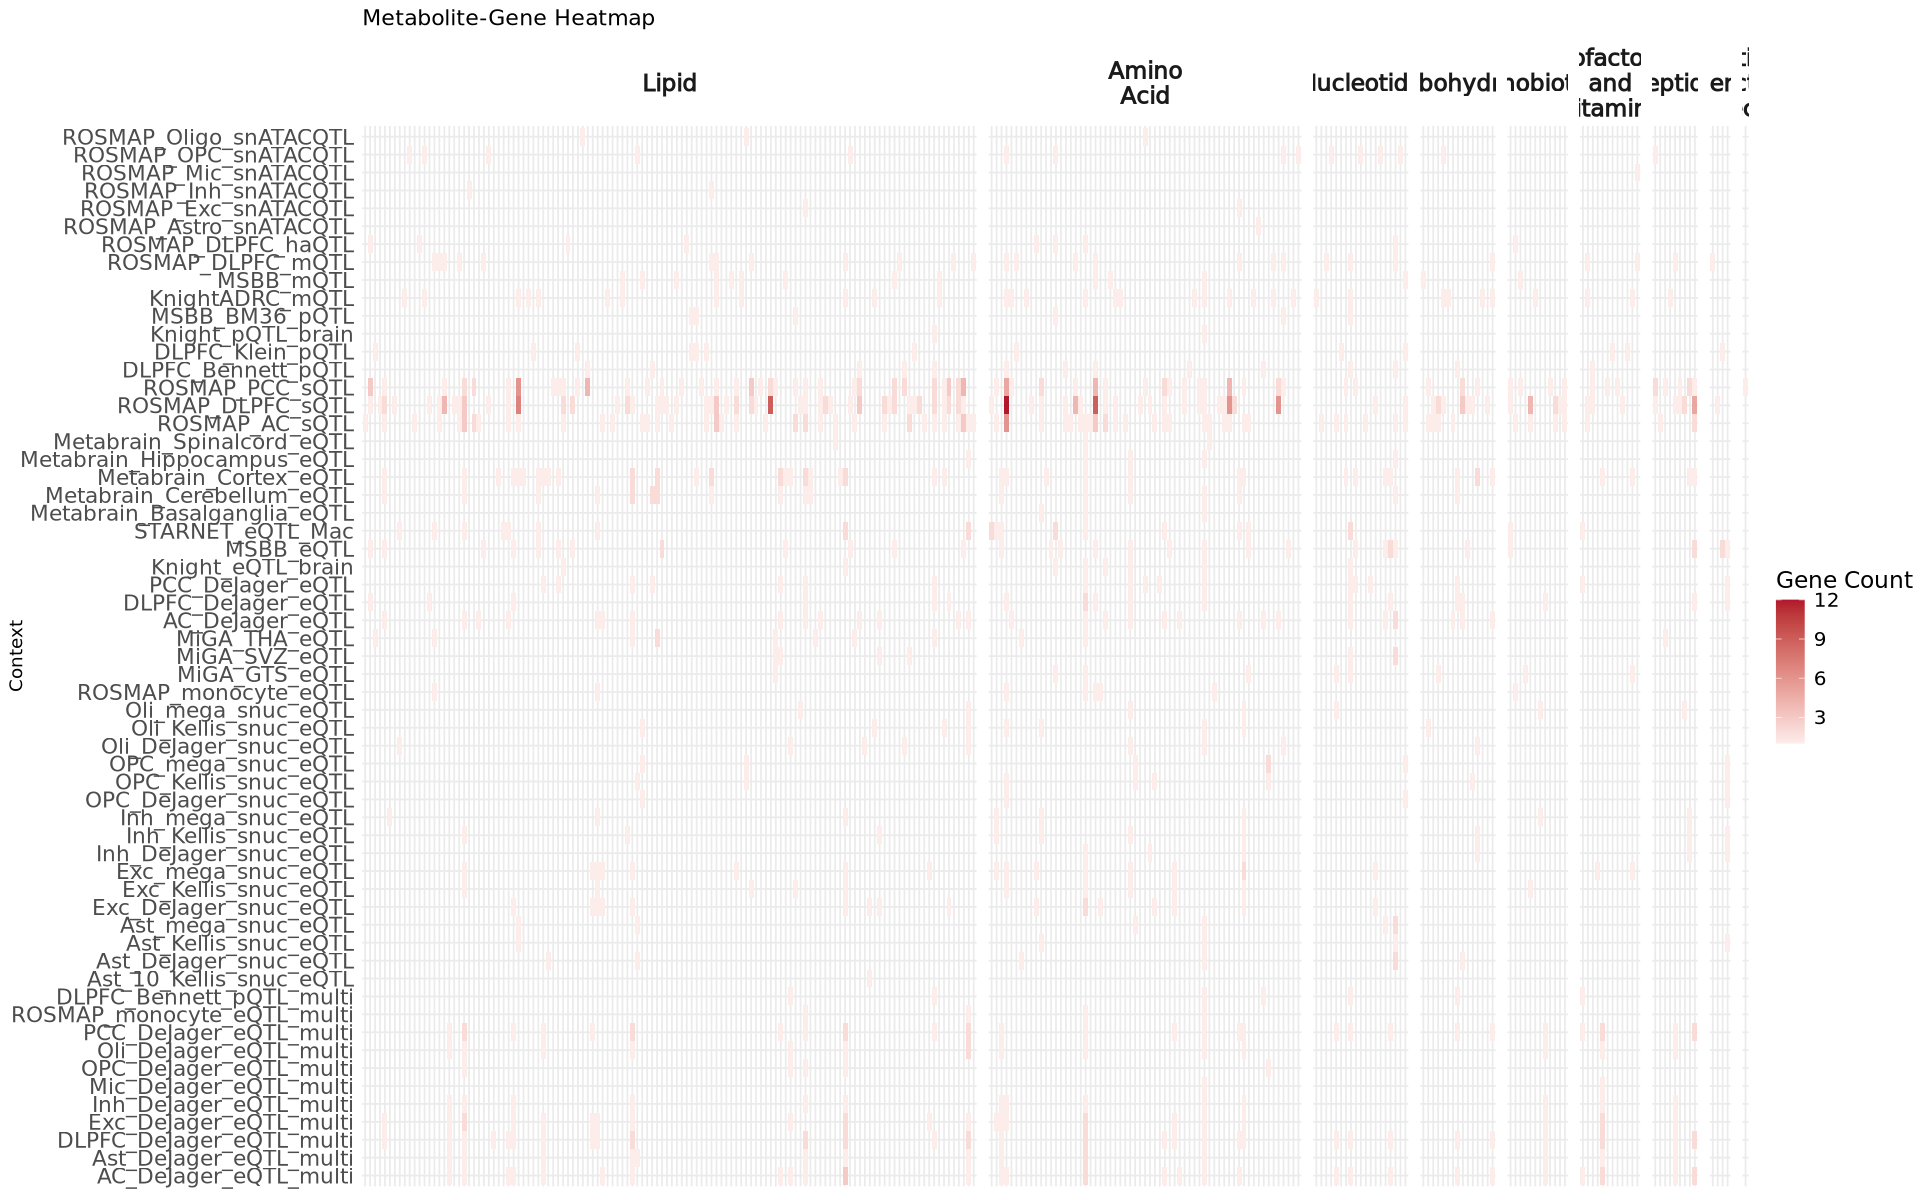

In [14]:
ggplot(df_merged, aes(x = metabolite, y = context_clean, fill = n_gene)) +
  geom_tile(color = NA) +  # Remove border lines
  scale_fill_gradient2(
    low = "#2166AC",  high = "#B2182B",
    name = "Gene Count"
  ) +
  facet_grid(~SUPER_PATHWAY, scales = "free_x", space = "free_x") +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.text.y = element_text(size = 13),
    strip.text = element_text(size = 14, face = "bold"),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    panel.spacing = unit(0.5, "lines"),
    axis.title.x = element_blank()
  ) +
  labs(
    y = "Context",
    title = "Metabolite-Gene Heatmap"
  )

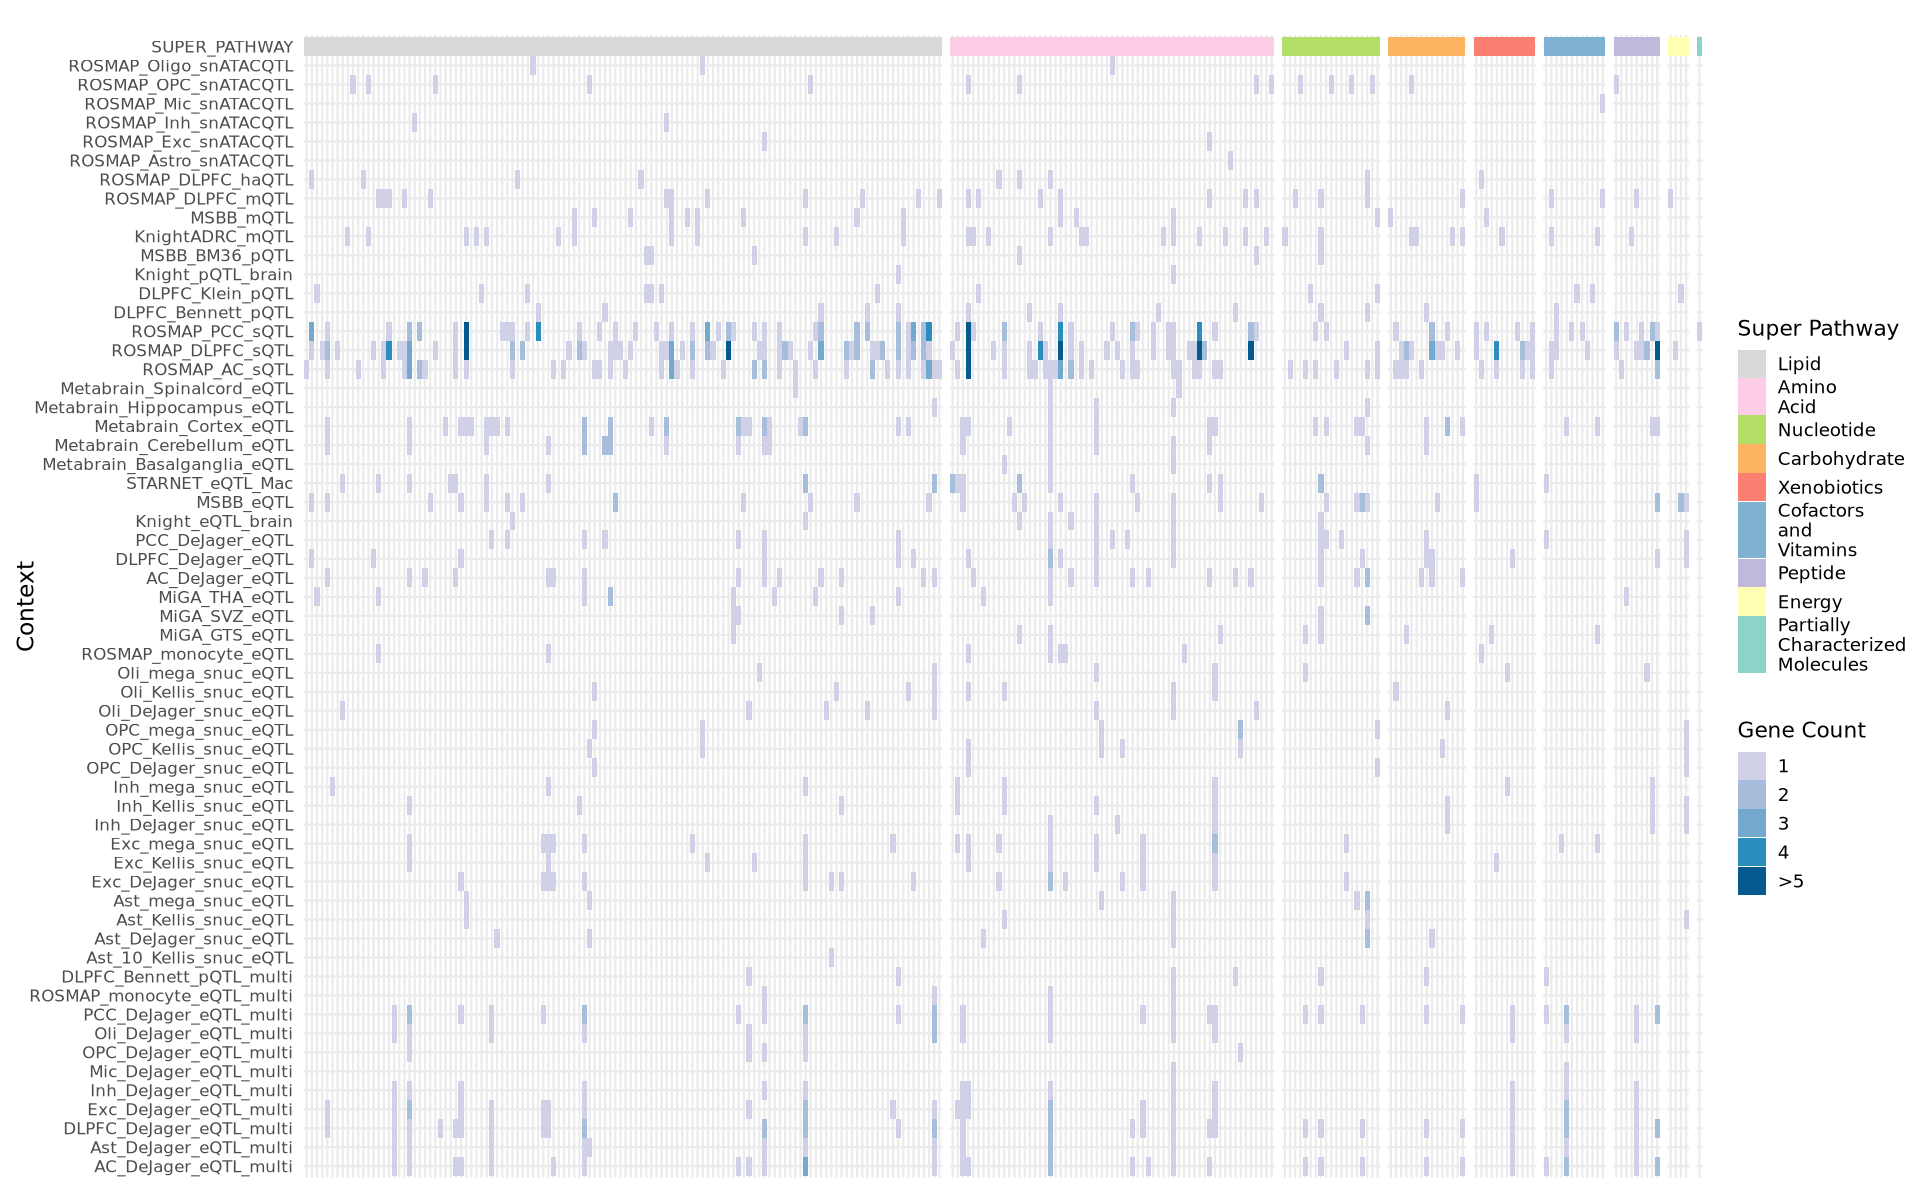

In [15]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(forcats)
library(ggnewscale)  # <--- for multiple fill scales

# Bin gene counts
df_merged <- df_merged %>% filter(n_gene > 0) %>% 
  mutate(
    gene_count_bin = case_when(
      n_gene == 1 ~ "1",
      n_gene == 2 ~ "2",
      n_gene == 3 ~ "3",
      n_gene == 4 ~ "4",
      n_gene >= 5 ~ ">5",
      TRUE ~ NA_character_
    ),
    gene_count_bin = factor(gene_count_bin, levels = c( "1", "2", "3", "4", ">5"))
  ) %>% distinct()
# Top annotation dataframe
top_annot <- df_merged %>%
  select(metabolite, SUPER_PATHWAY) %>%
  distinct()

# Generate colors for SUPER_PATHWAY
super_colors <- setNames(RColorBrewer::brewer.pal(length(unique(df_merged$SUPER_PATHWAY)), "Set3"), unique(df_merged$SUPER_PATHWAY))

# Plot
ggplot() +
  # Top bar: SUPER_PATHWAY
  geom_tile(data = top_annot, aes(x = metabolite, y = "SUPER_PATHWAY", fill = SUPER_PATHWAY), height = 1) +
  scale_fill_manual(values = super_colors, name = "Super Pathway") +

  ggnewscale::new_scale_fill() +  # allow new fill scale

  # Heatmap: gene count bins
  geom_tile(data = df_merged, aes(x = metabolite, y = context_clean, fill = gene_count_bin)) +
  scale_fill_manual(
    values = c("1" = "#d0d1e6", "2" = "#a6bddb", "3" = "#74a9cf", "4" = "#2b8cbe", ">5" = "#045a8d"),
    na.value = "grey90",
    name = "Gene Count"
  ) +

  facet_grid(~SUPER_PATHWAY, scales = "free_x", space = "free_x") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.text.y = element_text(size = 10),
    strip.text.x = element_text(angle = 45, hjust = 0, size = 0, face = "bold"),
    legend.title = element_text(size = 13),
    legend.text = element_text(size = 11),
    panel.spacing = unit(0.3, "lines"),
    plot.margin = margin(10, 10, 10, 10),
    axis.title.x = element_blank()
  ) +
  labs(
    y = "Context"
    #   ,
    # title = "Metabolite-Gene Heatmap with Super Pathway Annotation"
  )

In [342]:
ggsave('FunGen_xQTL_metabolites.coloc70.merged.Apr2025.flatten.pdf', height = 8, width=14)

In [323]:
res_df_sum %>% 
filter(str_detect(metabolite, 'CHEM100000282')) %>% #pull that metabolite
pull(contexts) %>% str_split(., '; ', simplify = T) %>% .[str_detect(., 'ROSMAP_DLPFC_sQTL')] %>% # pull sQTL contexts 
str_extract_all('ENSG[0-9]+') %>%  # pull related genes
unlist %>% unique %>% length

[1] 12

In [325]:
res_df_sum %>% 
filter(str_detect(metabolite, 'CHEM100001851')) %>% #pull that metabolite
pull(contexts) %>% str_split(., '; ', simplify = T) %>% .[str_detect(., 'ROSMAP_DLPFC_sQTL')] %>% # pull sQTL contexts 
str_extract_all('ENSG[0-9]+') %>%  # pull related genes
unlist %>% unique %>% length

[1] 9

In [326]:
res_df_sum %>% 
filter(str_detect(metabolite, 'CHEM100000282'))

metabolite                      n_gene
1 ROSMAP_metabolome_CHEM100000282 30    
  metabolite_regions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1 chr11_116513409_117835187_ROSMAP_metabolome_CHEM100000282; chr18_68166377_69581483_ROSMAP_metabolome_CHEM100000282; chr8_6537503_8880095_ROSMAP_metabolome_CHEM100000282; chr10_82231647_83966001_ROSMAP_metabolome_CHEM100000282; chr12_2067099_3219245_ROSMAP_metabolome_CHEM100000282; chr18_7090236_8658509_ROSMAP_metabolome_CHEM100000282; chr1_234364329_235656952_ROSMAP_metabolome_CHEM100000282; chr1_81525772_83003483_ROSMAP_metabolome_CHEM100000282; chr22_10516173_17414263_ROSMAP_metabolome_CHEM100000282; chr2_131938574_134400811_ROSMAP_metabolome_CHEM100000282; chr2_3926189_5567778_ROSMAP_metabolome_CHEM100000282; chr3_112690384_114706122_ROSMAP_metabolome_CHEM100000282; chr3_42375669_45108216_ROSMAP_metabolome_CHEM100000282; chr4_126353190_128547006_ROSMAP_metabolome_CHEM100000282; chr4_43205452_47542521_ROSMAP_metabolome_CHEM100000282; chr7_128149110_129951388_ROSMAP_metabolome_CHEM100000282; chr8_143034200_145075767_ROSMAP_metabolome_CHEM100000282; chr8_97568971_100485780_ROSMAP_metabolome_CHEM100000282; chr4_182023425_183841077_ROSMAP_metabolome_CHEM100000282
  contexts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [31]:
df_merged %>% filter(metabolite == 'CHEM100000282') %>% pull(contexts) %>% str_extract(., 'ENSG[0-9]+') %>% unique %>% na.omit() %>% length

[1] 30

In [335]:
coloc_res_paths_df %>% filter(str_detect(metabolite_region, 'CHEM100000282'), str_detect(context_region, 'ROSMAP_DLPFC_sQTL')) %>% # pull metabolite and sQTL contexts 
pull(context_region) %>% str_extract_all('ENSG[0-9]+') %>%  # pull related genes
unlist %>% unique %>% length

[1] 12

In [336]:
coloc_res_paths_df %>% filter(str_detect(metabolite_region, 'CHEM100000282'), str_detect(context_region, 'ROSMAP_AC_sQTL')) %>% # pull metabolite and sQTL contexts 
pull(context_region) %>% str_extract_all('ENSG[0-9]+') %>%  # pull related genes
unlist %>% unique %>% length

[1] 6

In [30]:
metabolite_meta%>% filter(metabolite == 'CHEM100020421')

CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,PATHWAY_STATUS,TYPE,INCHIKEY,...,CHEMICAL_NAME,SHORT_NAME,CAS,CHEMSPIDER,HMDB,KEGG,PLANT_CYC,PUBCHEM,PLATFORM,metabolite
<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
100020421,209,62564,219915,Amino Acid,Tyrosine Metabolism,164,NA,NAMED,,...,1-carboxyethyltyrosine,1-carboxyethyltyrosine,,,,,,,LC/MS Neg,CHEM100020421


In [22]:
gene_ref <- fread('/data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list')
gene_ref %>% head

#chr,start,end,gene_id,gene_name
<chr>,<int>,<int>,<chr>,<chr>
chr1,11868,11869,ENSG00000223972,DDX11L1
chr1,17435,17436,ENSG00000278267,MIR6859-1
chr1,29553,29554,ENSG00000243485,MIR1302-2HG
chr1,29569,29570,ENSG00000227232,WASH7P
chr1,30365,30366,ENSG00000284332,MIR1302-2
chr1,36080,36081,ENSG00000237613,FAM138A


In [35]:
res_df_sum_long %>% filter(str_detect(contexts, "Mic")) %>% mutate(gene_id = str_extract(contexts, 'ENSG[0-9]+')) %>% merge(gene_ref) %>% select(-metabolite_regions, -contexts) %>% merge(metabolite_meta %>% select(metabolite,SUPER_PATHWAY,  SUB_PATHWAY))

metabolite,gene_id,n_gene,context_clean,#chr,start,end,gene_name,SUPER_PATHWAY,SUB_PATHWAY
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
CHEM100001468,ENSG00000145390,2,Mic_DeJager_eQTL_multi,chr4,119212635,119212636,USP53,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism
CHEM100020421,ENSG00000133313,1,Mic_DeJager_eQTL_multi,chr18,74495815,74495816,CNDP2,Amino Acid,Tyrosine Metabolism


In [34]:
res_df_sum_long %>% filter(str_detect(contexts, "Ast")) %>% mutate(gene_id = str_extract(contexts, 'ENSG[0-9]+')) %>% merge(gene_ref) %>% select(-metabolite_regions, -contexts) %>% merge(metabolite_meta %>% select(metabolite,SUPER_PATHWAY,  SUB_PATHWAY)) %>% distinct

metabolite,gene_id,n_gene,context_clean,#chr,start,end,gene_name,SUPER_PATHWAY,SUB_PATHWAY
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
CHEM100000272,ENSG00000165055,1,Ast_DeJager_eQTL_multi,chr7,128476747,128476748,METTL2B,Amino Acid,"Glycine, Serine and Threonine Metabolism"
CHEM100000787,ENSG00000151067,2,Ast_DeJager_snuc_eQTL,chr12,1970785,1970786,CACNA1C,Amino Acid,Alanine and Aspartate Metabolism
CHEM100001247,ENSG00000099219,1,Ast_DeJager_eQTL_multi,chr9,5833116,5833117,ERMP1,Lipid,"Fatty Acid Metabolism (Acyl Carnitine, Medium Chain)"
CHEM100001253,ENSG00000203546,3,Ast_Kellis_snuc_eQTL,chr14,31457440,31457441,AL139353.1,Amino Acid,Glutamate Metabolism
CHEM100001468,ENSG00000145390,2,Ast_DeJager_eQTL_multi,chr4,119212635,119212636,USP53,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism
CHEM100001481,ENSG00000152102,3,Ast_DeJager_eQTL_multi,chr2,131093459,131093460,FAM168B,Lipid,Monoacylglycerol
CHEM100001662,ENSG00000160213,15,Ast_mega_snuc_eQTL,chr21,43776329,43776330,CSTB,Lipid,Carnitine Metabolism
CHEM100001662,ENSG00000104714,15,Ast_Kellis_snuc_eQTL,chr8,738105,738106,ERICH1,Lipid,Carnitine Metabolism
CHEM100001668,ENSG00000147813,4,Ast_DeJager_eQTL_multi,chr8,143578342,143578343,NAPRT,Amino Acid,Histidine Metabolism


In [59]:
target_id = 'ENSG00000137269'

In [60]:
res_df_sum_long %>% filter(str_detect(contexts, "Ast")) %>% mutate(gene_id = str_extract(contexts, 'ENSG[0-9]+')) %>% merge(gene_ref) %>% merge(metabolite_meta %>% select(metabolite,SUPER_PATHWAY,  SUB_PATHWAY)) %>% distinct %>% filter(gene_id ==target_id)

metabolite,gene_id,n_gene,metabolite_regions,contexts,context_clean,#chr,start,end,gene_name,SUPER_PATHWAY,SUB_PATHWAY
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
CHEM872,ENSG00000137269,5,chr19_56918544_58607520_ROSMAP_metabolome_CHEM872; chr6_52730905_54027603_ROSMAP_metabolome_CHEM872,ROSMAP_Kellis_eQTL.ENSG00000137269.univariate_bvsr_Ast_Kellis_eQTL_ENSG00000137269,Ast_Kellis_snuc_eQTL,chr6,53794496,53794497,LRRC1,Nucleotide,"Pyrimidine Metabolism, Thymine containing"
CHEM872,ENSG00000137269,5,chr19_56918544_58607520_ROSMAP_metabolome_CHEM872; chr6_52730905_54027603_ROSMAP_metabolome_CHEM872,ROSMAP_mega_eQTL.ENSG00000137269.univariate_bvsr_Ast_mega_eQTL_ENSG00000137269,Ast_mega_snuc_eQTL,chr6,53794496,53794497,LRRC1,Nucleotide,"Pyrimidine Metabolism, Thymine containing"
CHEM872,ENSG00000137269,5,chr19_56918544_58607520_ROSMAP_metabolome_CHEM872; chr6_52730905_54027603_ROSMAP_metabolome_CHEM872,ROSMAP_DeJager_eQTL.ENSG00000137269.univariate_bvsr_Ast_DeJager_eQTL_ENSG00000137269,Ast_DeJager_snuc_eQTL,chr6,53794496,53794497,LRRC1,Nucleotide,"Pyrimidine Metabolism, Thymine containing"


In [63]:
res <- readRDS('FunGen_xQTL_metabolites.coloc70.merged.Apr2025.rds')
matched_files <- lapply(res, function(x) {
  if (any(grepl(target_id, x$coloc_files))) {
    return(x$coloc_files[grepl(target_id, x$coloc_files) & grepl('Ast', x$coloc_files)])
  } else {
    return(NULL)
  }
})
matched_files <- unlist(matched_files[!sapply(matched_files, is.null)])
matched_files <- matched_files %>% gsub('/data/analysis_result/coloc/','/home/ubuntu/data/restored_dir',.)

In [79]:
matched_files

[1] "/home/ubuntu/data/restored_dir/metabolites_single_context/susie_coloc_xQTL/ROSMAP_metabolome_CHEM872_chr6_52730905_54027603.Ast_DeJager_eQTL_ENSG00000137269.coloc.rds"
[2] "/home/ubuntu/data/restored_dir/metabolites_single_context/susie_coloc_xQTL/ROSMAP_metabolome_CHEM872_chr6_52730905_54027603.Ast_Kellis_eQTL_ENSG00000137269.coloc.rds" 
[3] "/home/ubuntu/data/restored_dir/metabolites_single_context/susie_coloc_xQTL/ROSMAP_metabolome_CHEM872_chr6_52730905_54027603.Ast_mega_eQTL_ENSG00000137269.coloc.rds"

In [73]:
res1 <- readRDS(matched_files[1])
res1_cs <- res1[[1]]$sets$cs %>% unlist
res2 <- readRDS(matched_files[2])
res2_cs <- res2[[1]]$sets$cs %>% unlist
res3 <- readRDS(matched_files[3])
res3_cs <- res3[[1]]$sets$cs %>% unlist

In [78]:
res1[[1]]$sets

$cs
$cs[[1]]
 [1] "chr6:53750551:G:A"          "chr6:53730285:C:T"         
 [3] "chr6:53748635:C:A"          "chr6:53749012:C:T"         
 [5] "chr6:53750051:G:A"          "chr6:53734600:CT:CTT"      
 [7] "chr6:53735910:T:C"          "chr6:53737311:T:C"         
 [9] "chr6:53737660:A:AT"         "chr6:53740905:T:G"         
[11] "chr6:53741203:A:T"          "chr6:53743733:G:A"         
[13] "chr6:53748071:AT:A"         "chr6:53732574:ATTTT:ATTTTT"
[15] "chr6:53746225:GA:GAAA"      "chr6:53730846:T:C"         
[17] "chr6:53757611:G:C"         


$purity
  min.abs.corr mean.abs.corr median.abs.corr
1    0.9752752     0.9941628       0.9958225

$true_summary
  nsnps                       hit1              hit2    PP.H0.abf    PP.H1.abf
1  6089 chr6:53732574:ATTTT:ATTTTT chr6:53750551:G:A 2.310335e-19 7.475738e-18
    PP.H2.abf  PP.H3.abf PP.H4.abf idx1 idx2
1 0.001444717 0.04484044 0.9537148    1    1

In [82]:
Reduce(intersect, list(res1_cs, res2_cs, res3_cs)) %>% str_split(., ":", simplify = T) %>% .[,2] %>% as.numeric %>% summary

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
53730285 53736610 53741203 53742426 53748824 53757611 